In [2]:
import csv
import sys
import numpy as np
import math
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import sklearn
print(sklearn.__version__)
from sklearn.ensemble import VotingRegressor




0.21.0


### Entrada de datos

In [6]:

prefix =''
file ="raw_open.csv"
label="CCMP_Index_Open"
cols=["CRY_Index_Open","MO1_Comdty_Open"]
metodo="red"
fila =7 # que corresponde con el excel
p=20
f=30

dia_actual= 1500 # corresponde con la fila en el excel de datos



In [4]:
# salida: 
# valor_Actual,vlor_futuro, incr_real, incr_predicho, valor_futuro_predicho
def predice(file,label,cols,p,f,dia_actual):
    d = pd.read_csv(file,index_col=False)
    

    dia_actual = dia_actual-2
    dep=d[label]
    dep=dep[0:dia_actual+1]
    
    
    present = dep[(p):(len(dep)-f)].reset_index()
    future = dep[(f+p):len(dep)].reset_index()
    label1 = future.subtract(present, fill_value=0).reset_index()
    label2 = (label1[label]/present[label]).reset_index()
    label2=label2.drop(label2.columns[[0]], axis='columns')

  
    
    df = d[cols][:dia_actual+2] # coge de 0 a 29
    
    names=[]
    vs =range(0,p-1)
    for name in cols:
        for v in vs:
             names.append(name+str(p-v-1))

    df2=pd.DataFrame(columns=names)
    for i in range(p, (len(label2)+p)):# pra cadad fila 
        nrow=[]   
        for name in cols:
            
            for j in vs:#sus correspondientes pasados
                #if(i==p):
                #    print(df.iloc[(i)-(p-j)+1][name],df.iloc[(i)-(p-j)][name])
                    
                nrow.append(((df.iloc[(i)-(p-j)+1][name])-(df.iloc[(i)-(p-j)][name]))/ (df.iloc[(i)-(p-j)][name]))
        df2.append(nrow)
        df2 = df2.append(pd.Series(nrow, index=df2.columns ), ignore_index=True)
    
    #datos para el train
    datos=pd.concat([label2, df2], axis=1, sort=False)
    #print(datos.columns,vs)
    
    #datos para el test usar dep y df
    test=[]
    i=dia_actual+1 # se quiere predecir el dia 30

    for col in cols:
        for j in vs:#sus correspondientes pasados
            #print(col)
            #print(df.iloc[(i)-(p-j)+1][col])
            #print(df.iloc[(i)-(p-j)][col])
            test.append(((df.iloc[(i)-(p-j)+1][col])-(df.iloc[(i)-(p-j)][col]))/ (df.iloc[(i)-(p-j)][col]))
    #print(test)
    
    #reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
    #reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
    #reg3 = LinearRegression()
    #ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
    #ereg.fit(datos.iloc[:,1:], datos.iloc[:,0:1])
    #Y_pred = ereg.predict([test])
    
    #gbr = GradientBoostingRegressor()
    #gbr.fit(datos.iloc[:,1:], datos.iloc[:,0:1])
    #Y_pred = gbr.predict([test])
    
    #rfr = RandomForestRegressor()
    #rfr.fit(datos.iloc[:,1:], datos.iloc[:,0:1])
    #Y_pred = rfr.predict([test])
    
    red = MLPRegressor(hidden_layer_sizes=(100,50),activation='logistic')
    red.fit(datos.iloc[:,1:], datos.iloc[:,0:1])
    Y_pred = red.predict([test])
    
    #lr = linear_model.LinearRegression()
    #lr.fit(datos.iloc[:,1:], datos.iloc[:,0:1])
    #Y_pred = lr.predict([test])
        
                        
    
    a = d[label][dia_actual+1]
    b = d[label][dia_actual+1+f] #+1 porque  quieres ver   a partir de mañana el incremente en f dias NO apartir del dia actual
    predicho = (Y_pred[0]+1)*(a)
    return a,b,(b-a)/a,Y_pred[0],predicho

                      

In [7]:
import warnings
warnings.filterwarnings('ignore')
predichos =[]
reales=[]
puntos=[]
naive= []
# hace test de dias de 10 en 10
for dia in range(dia_actual,2631-f,10):
    actual,futuro,incr_real,incr,predicho = predice(prefix+file,label,cols,p,f,dia)# predicion de el incremento que se dara  entre mañana y f dias después
    print( (dia-1500)/10,actual,futuro,incr_real,predicho,incr)
    naive.append(actual)
    reales.append(futuro)
    predichos.append(predicho)
    puntos.append(dia)

0.0 4169.351 4053.275 -0.027840304162446285 4217.407262678155 0.011526077482599983
1.0 4181.21 4136.092000000001 -0.010790656293273833 4233.0146044634785 0.012389859505616357
2.0 4174.608 4259.117 0.020243577361036057 4247.6038651624085 0.01748568132921907
3.0 4053.275 4370.1359999999995 0.07817406911694849 4086.210454528634 0.008125640260933042
4.0 4136.092000000001 4472.892 0.08142952332781747 4158.442948623196 0.00540388091541346
5.0 4259.117 4411.52 0.035782769057530056 4344.849379883874 0.020129144112235778
6.0 4370.1359999999995 4421.293 0.011706043015594974 4436.043216083625 0.015081273462341931
7.0 4472.892 4438.126 -0.00777259991969393 4545.720730595435 0.016282246608108564
8.0 4411.52 4552.545999999999 0.03196766647323347 4450.3917936951075 0.008811428644799807
9.0 4421.293 4567.643 0.0331011765110343 4473.260206226192 0.011753848077065338
10.0 4438.126 4540.818 0.023138594983558376 4519.425631941839 0.01831845962503956
11.0 4552.545999999999 4458.291 -0.020703799588186307 46

97.0 6887.385 7457.944 0.08284116540602858 7065.72491854428 0.025893705454868382
98.0 6953.38 7067.298000000001 0.01638311152274154 7158.904986603574 0.02955756575990015
99.0 7168.734 7252.465 0.011680026068759109 7285.7509336979 0.016323235552874377
100.0 7457.944 7422.771 -0.004716179150715087 7542.030211667522 0.011274717491512556
101.0 7067.298000000001 7257.545999999999 0.026919481816105484 7227.018059889305 0.02259987620294257
102.0 7252.465 7099.254 -0.021125369098644424 7331.780459986763 0.010936345089119684
103.0 7422.771 7258.615 -0.022115191213631667 7543.934192652161 0.016323175354885845
104.0 7257.545999999999 7065.026 -0.02652687285757466 7433.177964537007 0.02419991062226932
105.0 7099.254 7379.58 0.039486684093849866 7209.188630796195 0.015485377871561505
106.0 7258.615 7455.581 0.027135479702395066 7335.297171153843 0.010564297893447011
107.0 7065.026 7723.534000000001 0.09320673412949941 7228.884743665208 0.02319294276697749
108.0 7379.58 7438.113 0.007931752213540656

In [23]:
#hecho
perceptron2 = predichos
perceptron2=pd.DataFrame(perceptron2)
perceptron2.to_csv('PrediccionesPerceptronModCCMP.csv', header=False, index=False)

In [24]:
perceptron = pd.read_csv("PrediccionesPerceptronCCMP.csv",header=None,index_col=False)



In [25]:
#hecho
gradient=pd.read_csv('PrediccionesGradientCCMP.csv',header=None,index_col=False)
#gradient=pd.DataFrame(gradient)
#gradient.to_csv('PrediccionesGradientCCMP.csv', header=False, index=False)

In [26]:
#haciendo
random=pd.read_csv('PrediccionesRandomCCMP.csv',header=None,index_col=False)
#random= predichos
#random=pd.DataFrame(random)
#random.to_csv('PrediccionesRandomCCMP.csv', header=False, index=False)

In [27]:
#hecho
votin=pd.read_csv('PrediccionesVotinCCMP.csv',header=None,index_col=False)
#votin=predichos
#votin=pd.DataFrame(votin)
#votin.to_csv('PrediccionesVotinCCMP.csv', header=False, index=False)

In [28]:
#hecho
arima = pd.read_csv("PrediccionesArimaCCMP.csv",index_col=False)
arima=list(arima['x'])
print(len(arima))

111


In [29]:
#haciendose
lineal=pd.read_csv('PrediccionesLinealCCMP.csv',header=None,index_col=False)
#lineal=predichos
#lineal=pd.DataFrame(lineal)
#lineal.to_csv('PrediccionesLinealCCMP.csv', header=False, index=False)


[4171.727396173211, 4180.12920161841, 4174.22366872274, 4054.1591719500702, 4135.33087196006, 4258.2257920826205, 4369.48932981149, 4472.55312629486, 4412.20441278524, 4422.2032235507, 4437.51614560308, 4552.94808137161, 4567.39707529433, 4540.32843204148, 4456.72957970489, 4427.445566265539, 4617.3635334007895, 4655.94327452407, 4771.73547123054, 4708.0331798650295, 4790.52797525538, 4656.3957212158, 4638.70434545229, 4826.84304167645, 4969.01284460245, 4854.37044212798, 4839.975270979539, 4949.83008337846, 5020.38753575773, 4918.77060607968, 5066.121368504149, 5078.77068424825, 5081.61287214687, 5024.4032711636, 5137.48349185173, 5100.224078827539, 5049.39664426757, 4753.822352008579, 4755.967853725429, 4720.760494918879, 4775.02075937593, 4877.67462601876, 5144.69477889081, 5074.09326104114, 5144.00356227615, 5083.5492762501, 5050.40996270225, 4555.345931291939, 4534.72223261085, 4224.65198163549, 4548.43042812616, 4689.64450144741, 4747.7935788082, 4890.64259809411, 4948.7432865618

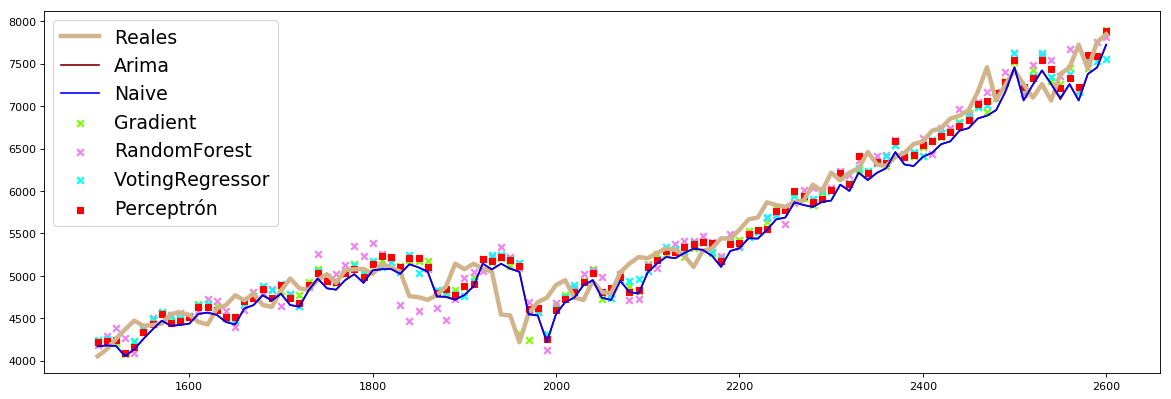

In [34]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

#plt.scatter(puntos,rv2,)

plt.plot(puntos,reales,color='tan',lw=4, label="Reales")
plt.plot(puntos,arima,color='maroon',label ="Arima")
plt.plot(puntos,naive,color='blue',label ="Naive")

#plt.scatter(puntos,lineal,lw=2,color='black',label ="Reg.Lineal",marker='x')

plt.scatter(puntos,gradient,lw=2,color='chartreuse',label ="Gradient",marker='x')
plt.scatter(puntos,random,lw=2,color='violet',label ="RandomForest",marker='x')
plt.scatter(puntos,votin,lw=2,color='cyan',label ="VotingRegressor",marker='x')

plt.scatter(puntos,perceptron2,lw=1,marker='s',color='red', label="Perceptrón")


plt.legend(loc='upper left',prop={'size': 17})
plt.savefig(label+metodo+str(fila)+'total.png')
plt.show()

plt.close()


In [ ]:
naive<-c(naive,valores[])